In [5]:
:set -ilib
:l lib/Nat.hs

import Cp
import Nat
import Criterion.Main

In [ ]:
fIneficiente a b c 0 = 0
fIneficiente a b c 1 = 1
fIneficiente a b c 2 = 1
fIneficiente a b c n = a * fIneficiente a b c (n - 1) + b * fIneficiente a b c (n - 2) + c * fIneficiente a b c (n - 3)

In [ ]:
fEficiente a b c = p1 . for (split (p1 . p2) (split (p2 . p2) (k2 a b c))) (0, (1,1))
    where k2 a b c (x, (y, z)) = a * z + b * y + c * x

In [13]:
fIneficiente 3 3 3 3

6

In [ ]:
fEficiente 3 3 3 3

6

## import Criterion.Main
import Criterion.Measurement as CM
import Criterion.Measurement.Types

iterations = 10

average :: [Double] -> Double
average = uncurry (/) . split sum (fromIntegral . length)

measureNTimes 0 _ _ = return []
measureNTimes n f x = do
    res <- measureNTimes (n - 1) f x
    (m, d) <- CM.measure (nf f x) 1
    return (measTime m : res)

measureTime f n = do
    values <- measureNTimes iterations f n
    return (average values)

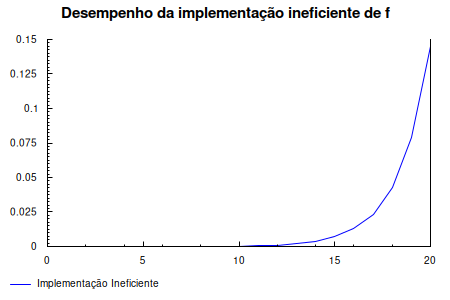

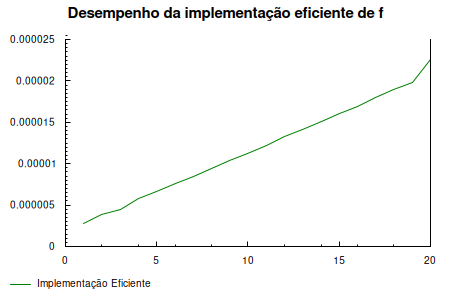

In [ ]:
--Example adapted from https://github.com/timbod7/haskell-chart/wiki/example-2

import System.Environment(getArgs)
import Data.Colour.Names
import Data.Colour
import Control.Lens
import Data.Default.Class
import Data.Time.LocalTime
import Graphics.Rendering.Chart
import Graphics.Rendering.Chart.Backend.Cairo

maxValue = 20

a = 2
b = 3
c = 4

pointsAux :: [Int] -> (Int -> Int) -> IO [(Int,Double)]
pointsAux [] _ = return []
pointsAux (h:t) f = do
    t' <- pointsAux t f
    d  <- measureTime f h
    return ((h,d):t')

points :: (Int -> Int) -> IO [(Int,Double)]
points f = pointsAux [1..maxValue] f

pGood <- points (fEficiente a b c)
pBad <- points (fIneficiente a b c)

chart1 = toRenderable layout 
  where

    bad = plot_lines_style . line_color .~ opaque blue
           $ plot_lines_values .~ [pBad]
           $ plot_lines_title .~ "Implementação Ineficiente"
           $ def

    

    layout = layoutlr_title .~"Desempenho da implementação ineficiente de f"
           $ layoutlr_left_axis . laxis_override .~ axisGridHide
           $ layoutlr_right_axis . laxis_override .~ axisGridHide
           $ layoutlr_x_axis . laxis_override .~ axisGridHide
           $ layoutlr_plots .~ [Left (toPlot bad)]
           $ layoutlr_grid_last .~ False
           $ def

chart2 = toRenderable layout
    where
    good = plot_lines_style . line_color .~ opaque green
           $ plot_lines_values .~ [ pGood ]
           $ plot_lines_title .~ "Implementação Eficiente"
           $ def
           
    
    layout = layoutlr_title .~"Desempenho da implementação eficiente de f"
           $ layoutlr_left_axis . laxis_override .~ axisGridHide
           $ layoutlr_right_axis . laxis_override .~ axisGridHide
           $ layoutlr_x_axis . laxis_override .~ axisGridHide
           $ layoutlr_plots .~ [Left (toPlot good)]
           $ layoutlr_grid_last .~ False
           $ def

chart1

chart2
